# ***Import the Libraries***

In [1]:
#Import the required  libraries for Logistic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
import ppscore as ps  
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

In [2]:
#Importing the training and testing data
TrainingData=pd.read_csv("https://raw.githubusercontent.com/priyankamoree/Machine-Learning-Models-/main/Dataset/Titanic_train.csv")
TestingData=pd.read_csv("https://raw.githubusercontent.com/priyankamoree/Machine-Learning-Models-/main/Dataset/Titanic_test.csv")

In [3]:
#To know how much of the data we have 
len(TrainingData),len(TestingData)

(891, 418)

In [4]:
#Combining the given data for peforming the Exploratory Data Analysis(EDA)
combined_data = pd.concat([TrainingData,TestingData],ignore_index=True)

In [5]:
len(combined_data)

1309

In [6]:
combined_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#For Discreptive Statistics 
combined_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# **Exploratory Data Analysis**

In [8]:
#Dropping the unnececcary columns which will not affect our data base even if they won't be present 
combined_data.drop(columns=['Name','PassengerId','Ticket','Embarked','Fare','SibSp','Parch'],inplace=True)

In [9]:
#Checking if our data has missing values or not
combined_data.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
Cabin       1014
dtype: int64

In [10]:
#For checking the Percentage of the missing values for each column 
for i in combined_data.columns:
    print(f'Percentage of missing values in {i} column: {combined_data[i].isna().sum()/len(combined_data[i])*100}')

Percentage of missing values in Survived column: 31.932773109243694
Percentage of missing values in Pclass column: 0.0
Percentage of missing values in Sex column: 0.0
Percentage of missing values in Age column: 20.091673032849503
Percentage of missing values in Cabin column: 77.46371275783041


In [11]:
#handle the missing values 
combined_data['Survived'].fillna(combined_data['Survived'].median(),inplace=True)
combined_data['Age'].fillna(combined_data['Age'].median(),inplace=True)
#Dropping cabin column because it has more than 50% of missing value 
combined_data.drop(columns=['Cabin'],inplace=True)  

In [12]:
combined_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [13]:
#Categorical Columns needs to be converted into numerical columns for Model Building so we performing One Hot Encoding
combined_data = pd.get_dummies(combined_data,columns=['Sex'],dtype=int)

In [14]:
combined_data

,Survived,Pclass,Age,Sex_female,Sex_male
0,0.0,3,22.0,0,1
1,1.0,1,38.0,1,0
2,1.0,3,26.0,1,0
3,1.0,1,35.0,1,0
4,0.0,3,35.0,0,1
...,...,...,...,...,...
1304,0.0,3,28.0,0,1
1305,0.0,1,39.0,1,0
1306,0.0,3,38.5,0,1
1307,0.0,3,28.0,0,1


In [15]:
combined_data.dtypes

Survived      float64
Pclass          int64
Age           float64
Sex_female      int32
Sex_male        int32
dtype: object

# ***Data Visualization***

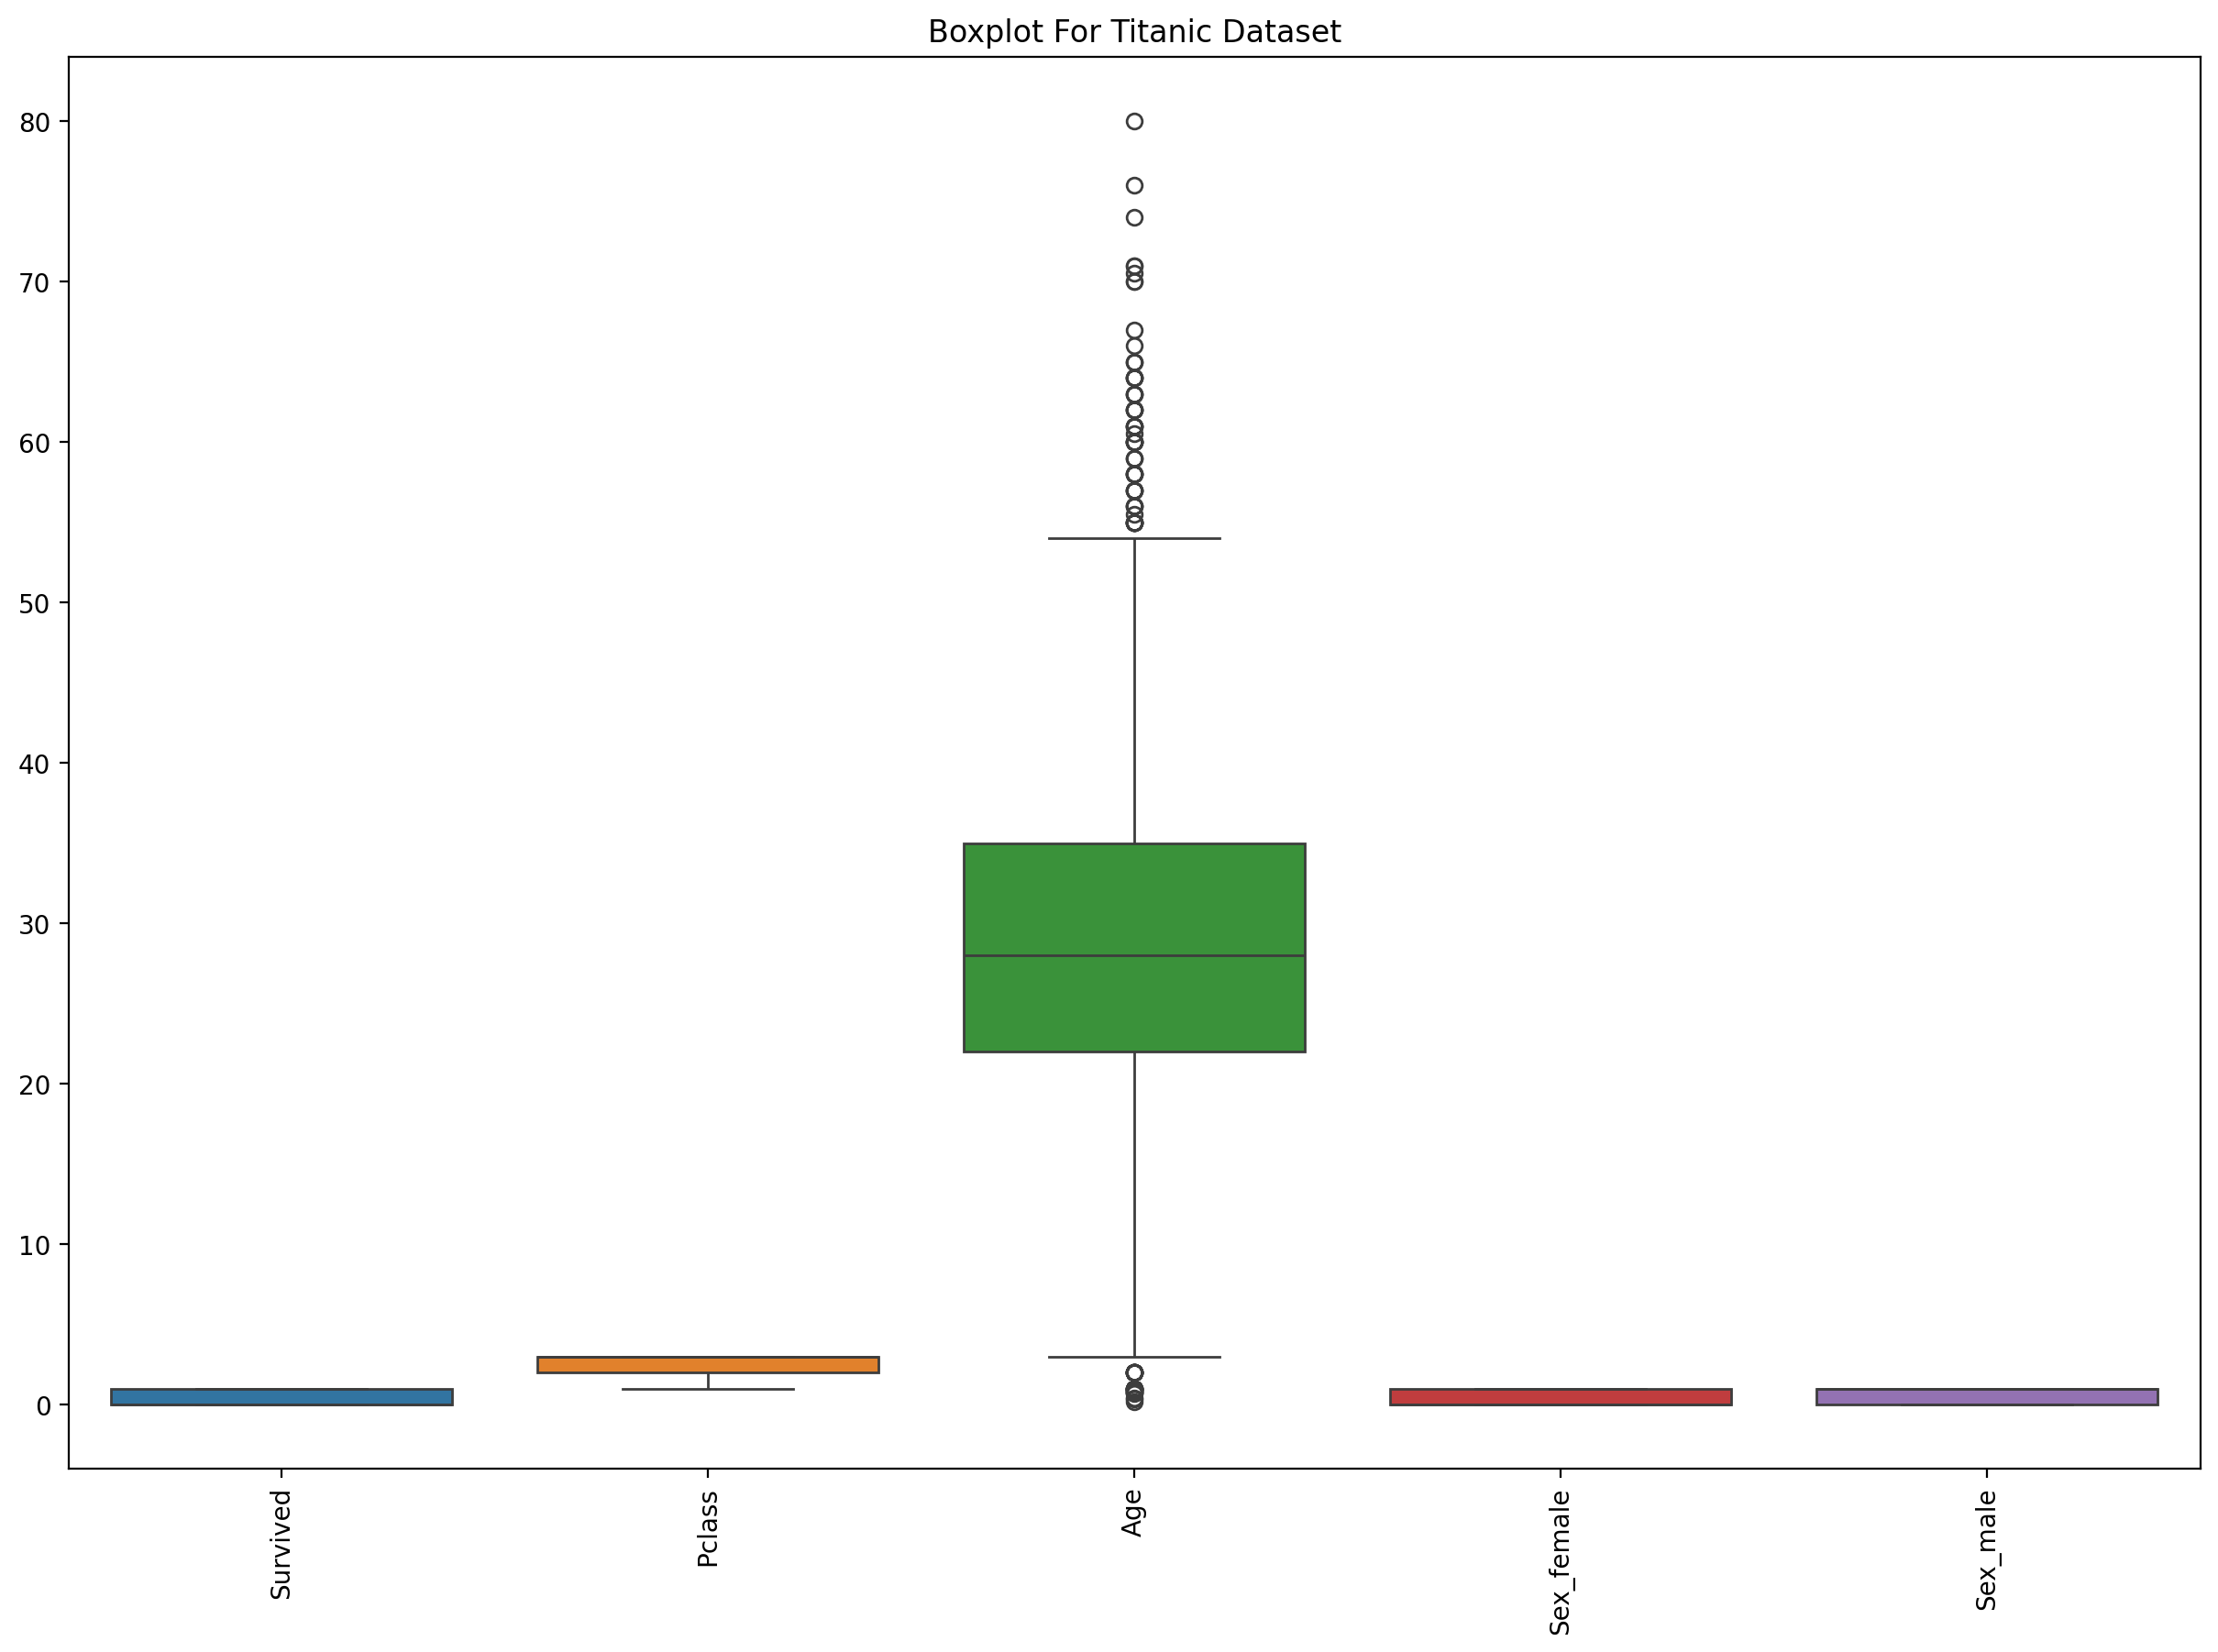

In [16]:
#Boxplot For Visualizing The Outliers in Titanic Dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=combined_data)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset")
plt.show()

In [17]:
def Outlier_Detection(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        data[col]=np.where(data[col]>upper,upper,np.where(data[col]<lower,lower,data[col]))

In [18]:
Outlier_Detection(combined_data,combined_data.columns)

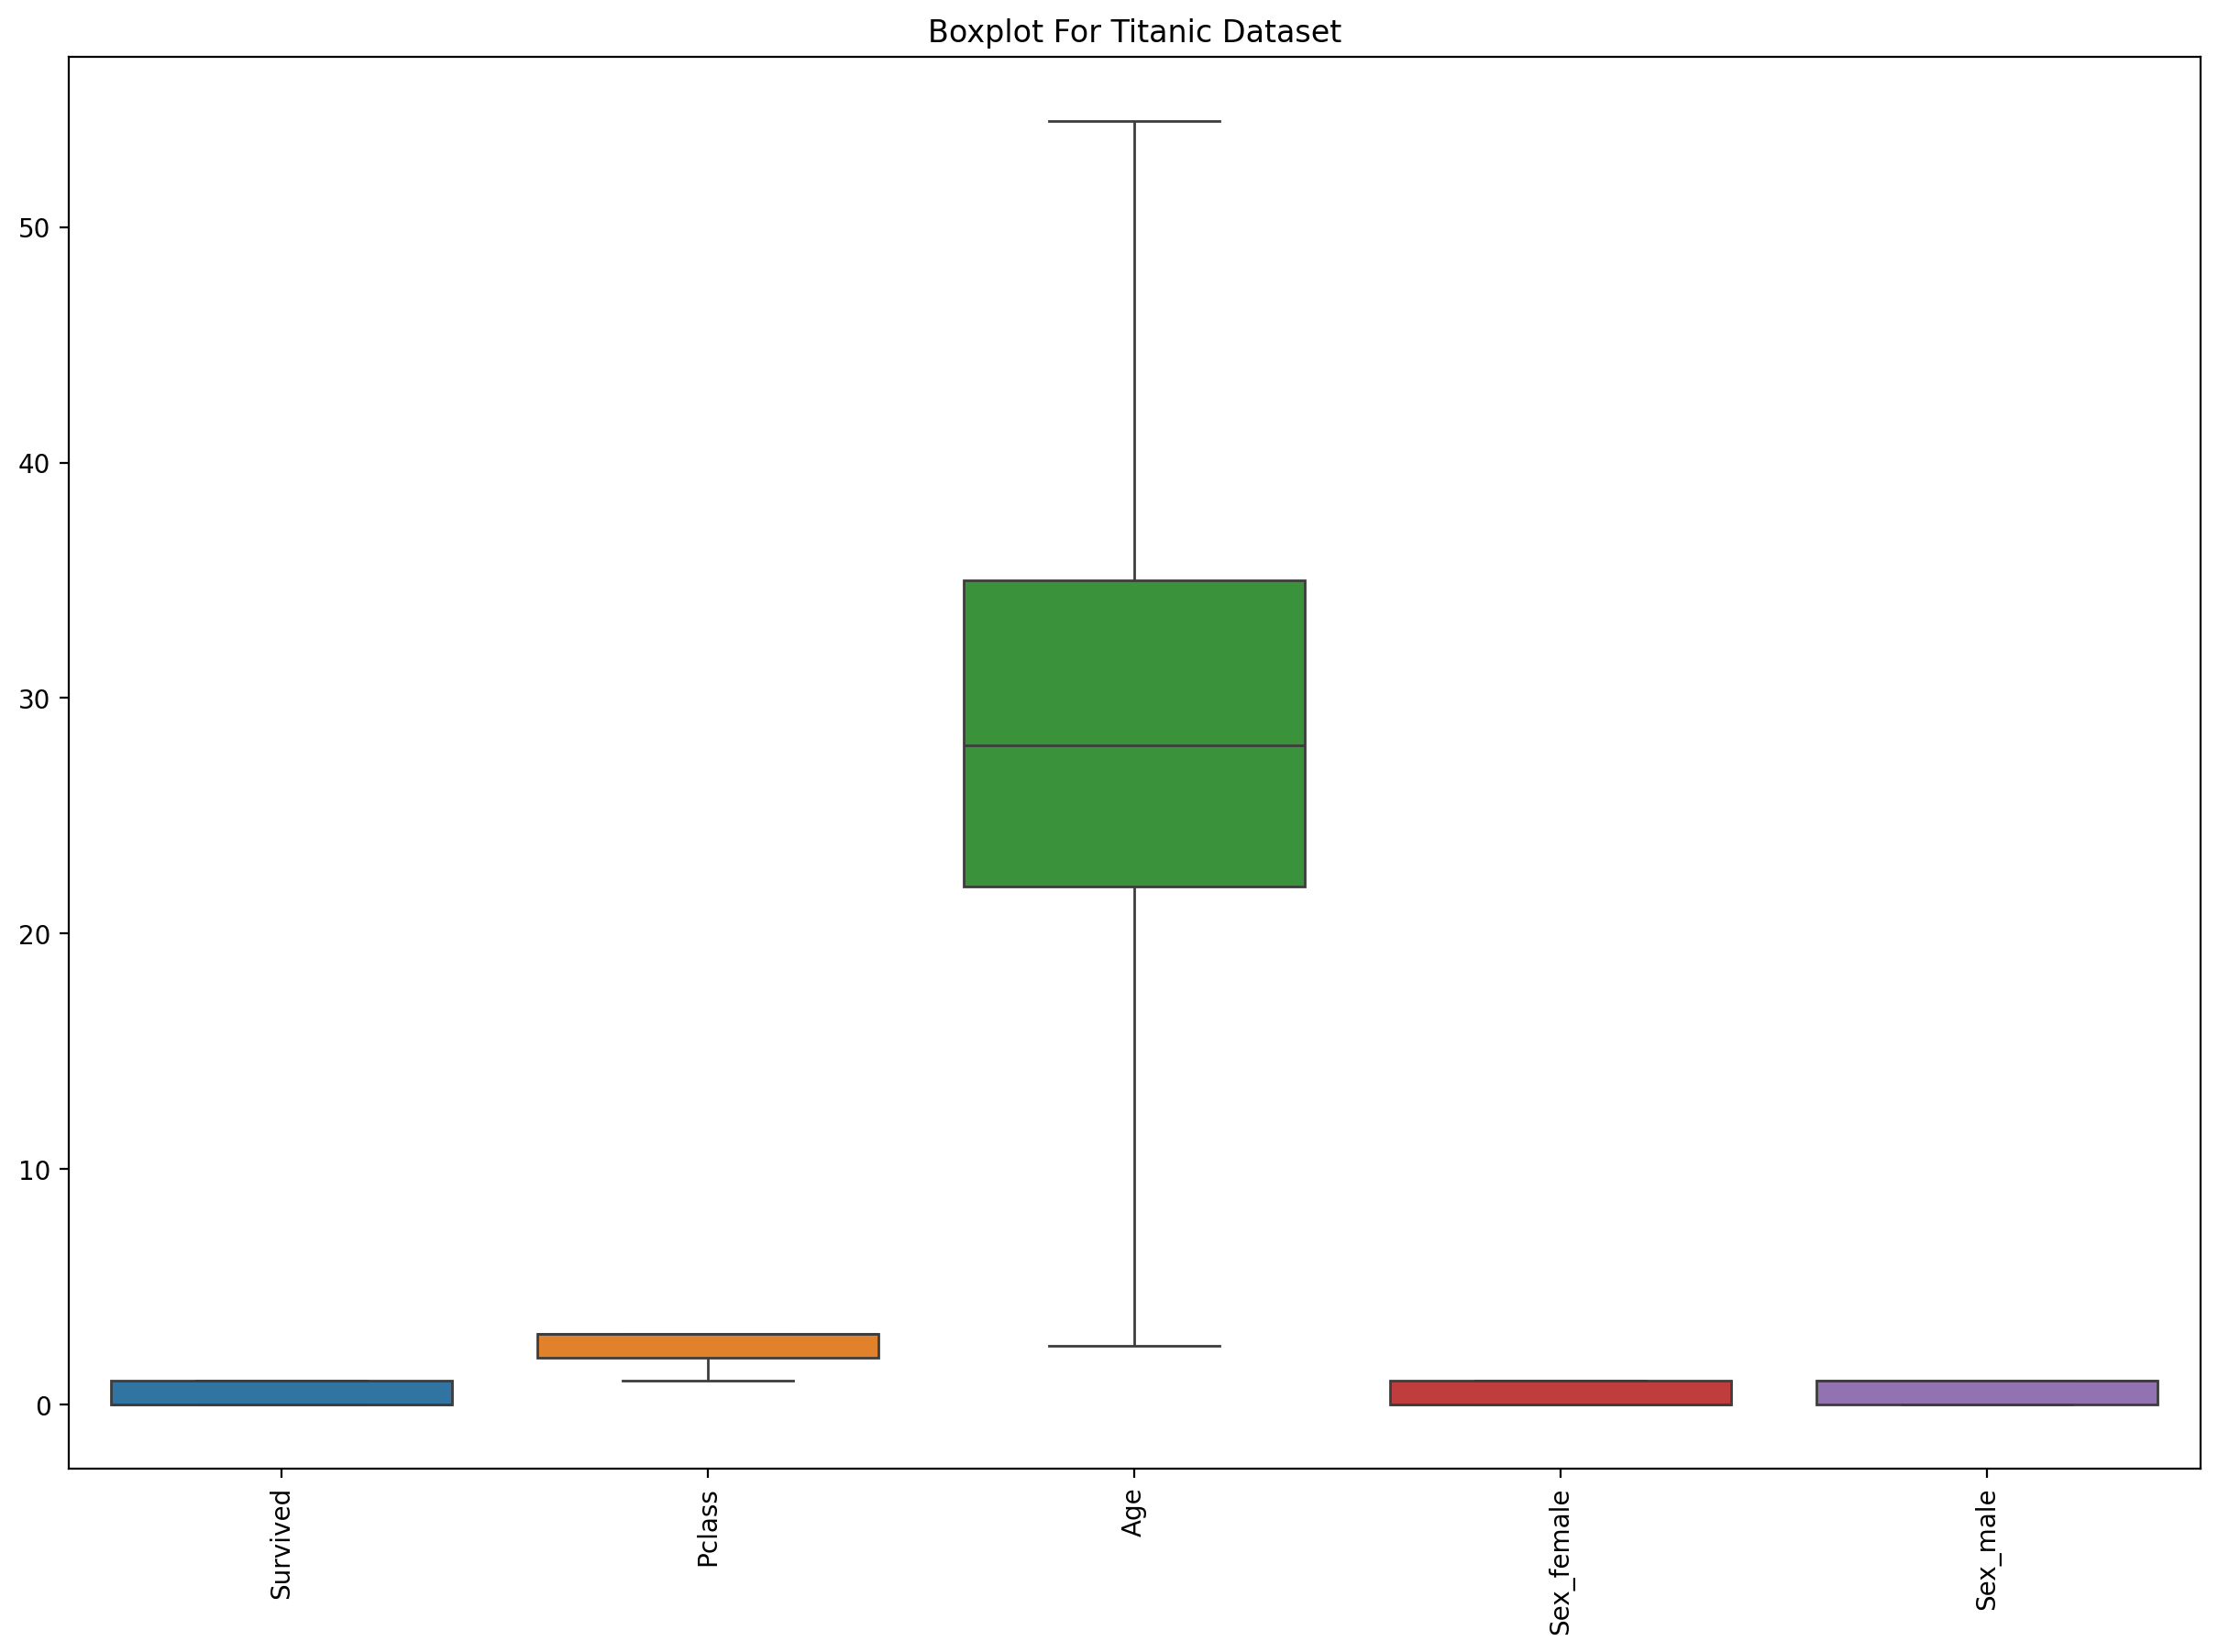

In [19]:
#Boxplot For Visualizing The Outliers in Titanic Dataset after Dealing with the outliers 
plt.figure(figsize=(15,10))
sns.boxplot(data=combined_data)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset")
plt.show()

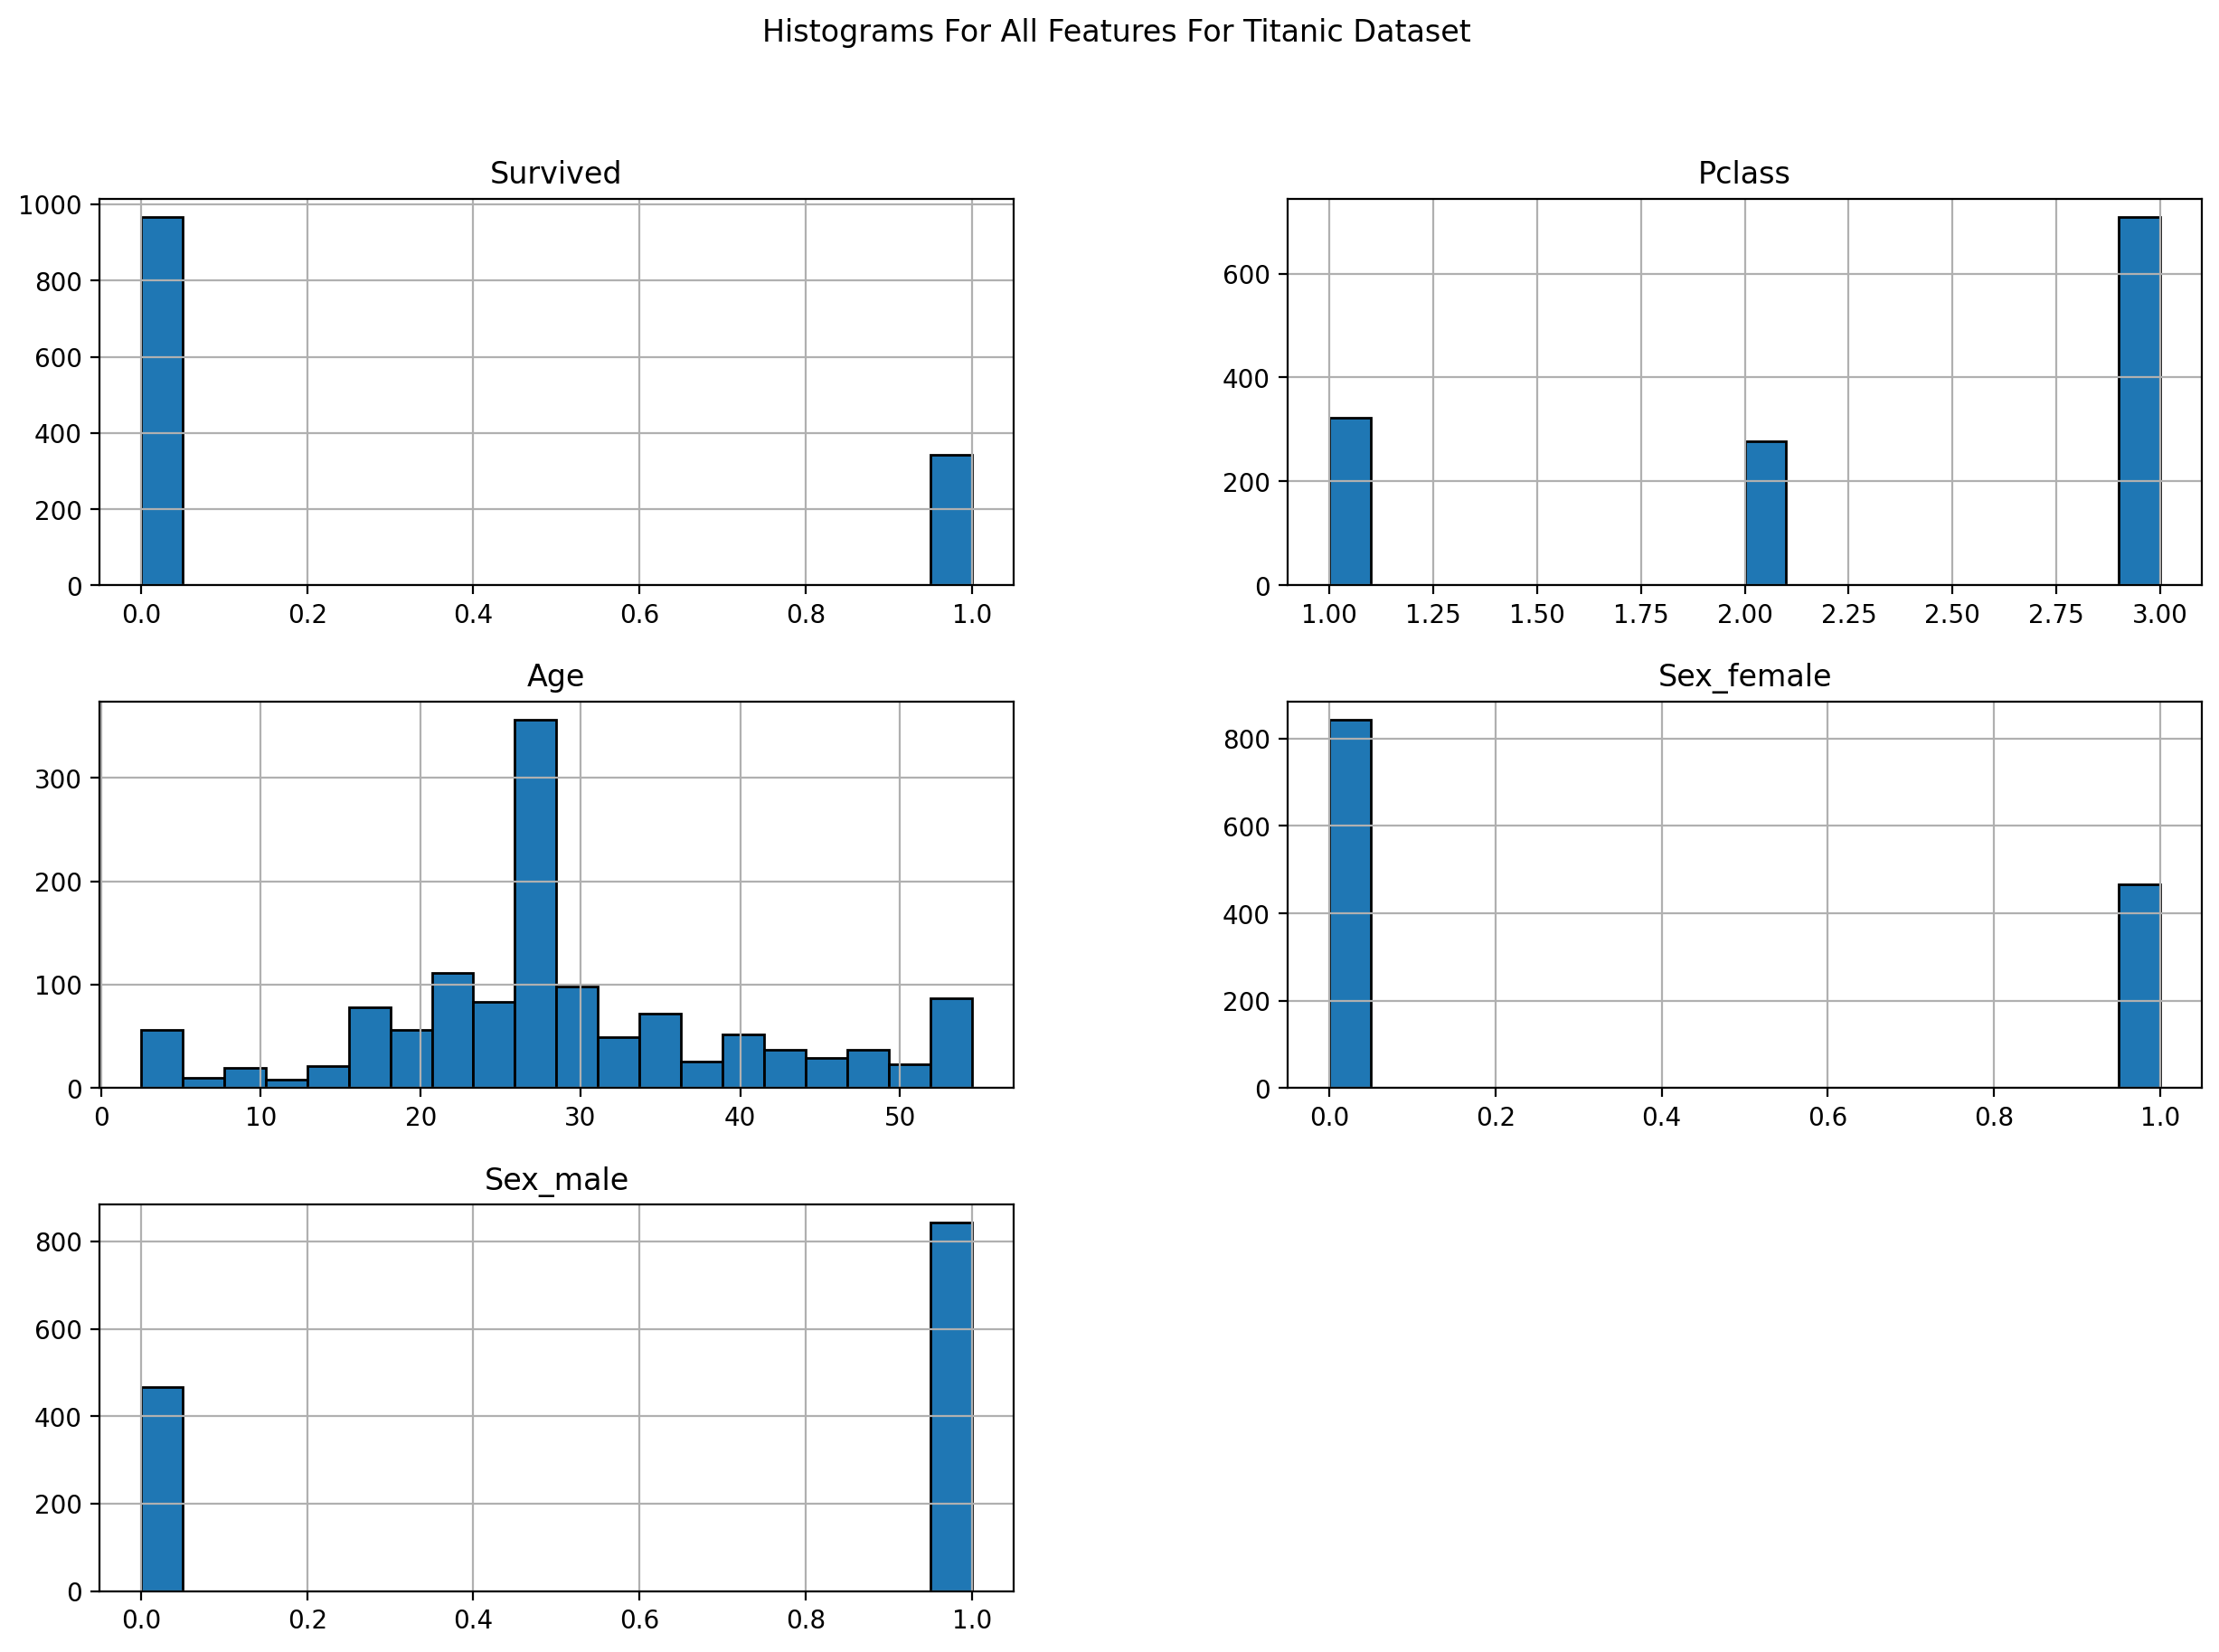

In [20]:
#Historgram For all the features
combined_data.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms For All Features For Titanic Dataset")
plt.show()

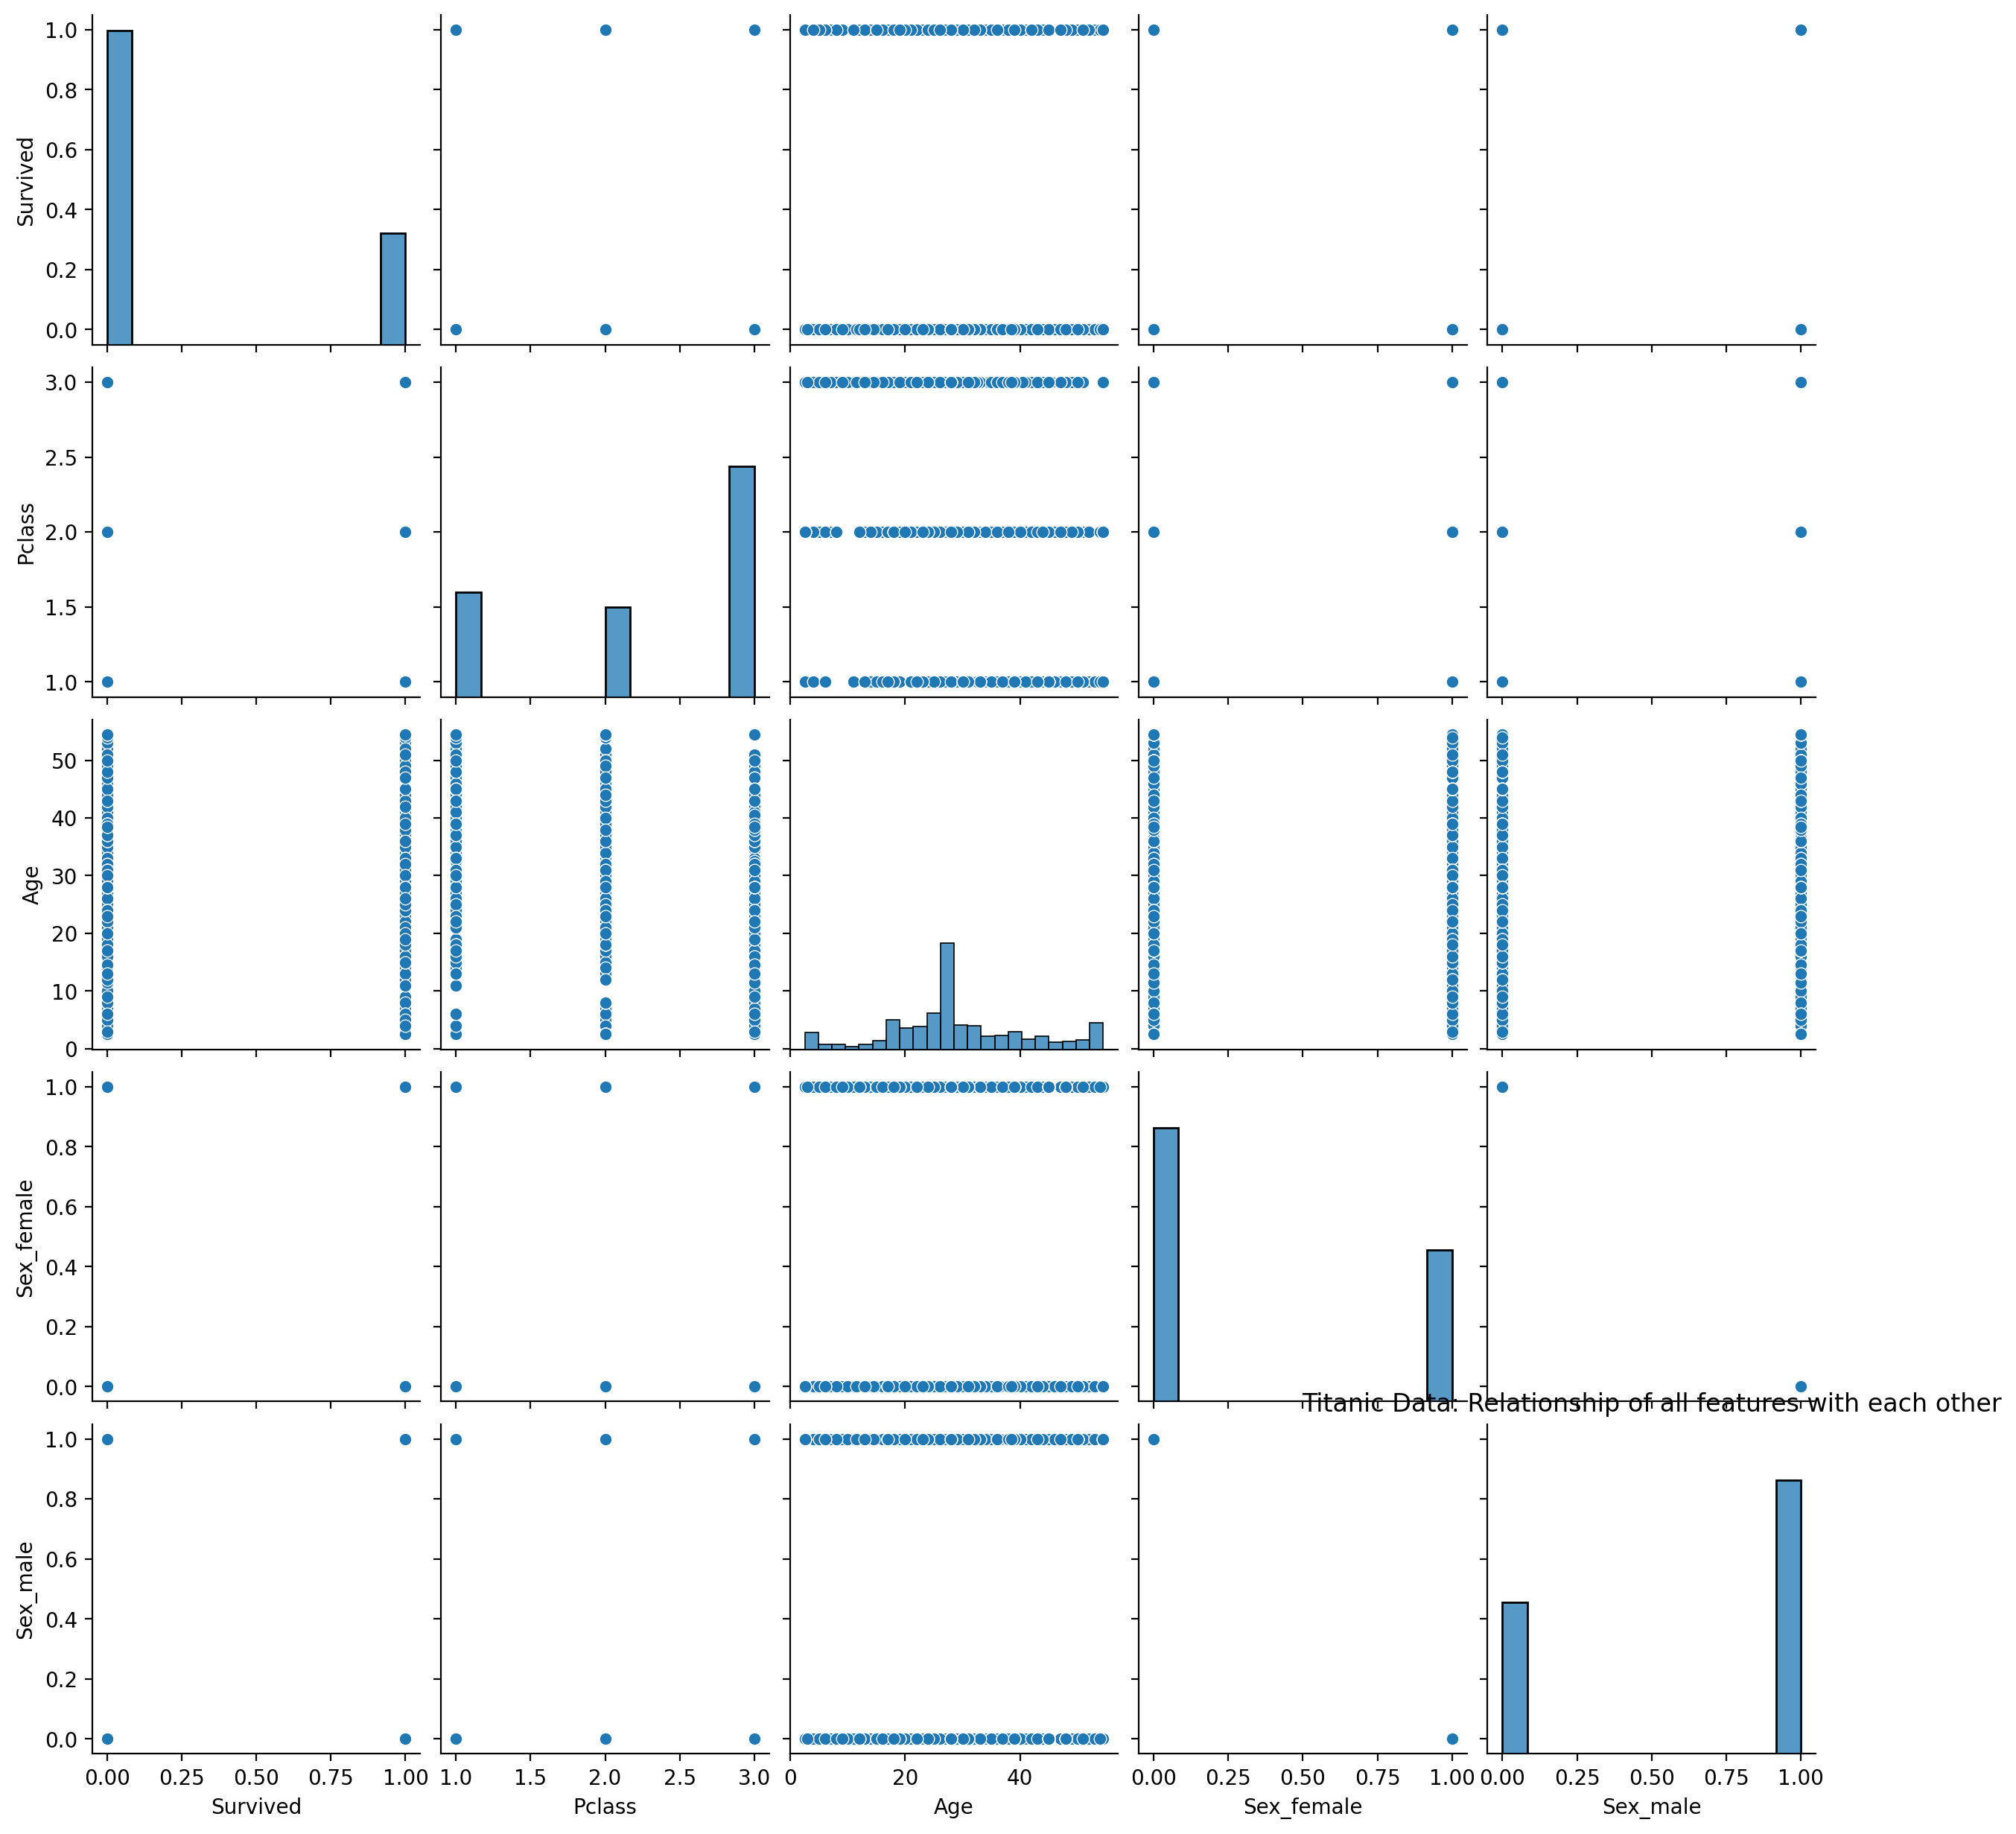

In [21]:
#Pairplot to visualize all the relationships between the features of Titanic Dataset
sns.pairplot(combined_data)
plt.title("Titanic Data: Relationship of all features with each other")
plt.show()

In [22]:
combined_data.corr()

,Survived,Pclass,Age,Sex_female,Sex_male
Survived,1.000000,-0.244686,-0.053418,0.404020,-0.404020
Pclass,-0.244686,1.000000,-0.378527,-0.124617,0.124617
Age,-0.053418,-0.378527,1.000000,-0.051779,0.051779
Sex_female,0.404020,-0.124617,-0.051779,1.000000,-1.000000
Sex_male,-0.404020,0.124617,0.051779,-1.000000,1.000000


In [23]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [24]:
!pip install seaborn --upgrade

In [25]:
print(sns.__version__)

0.13.2


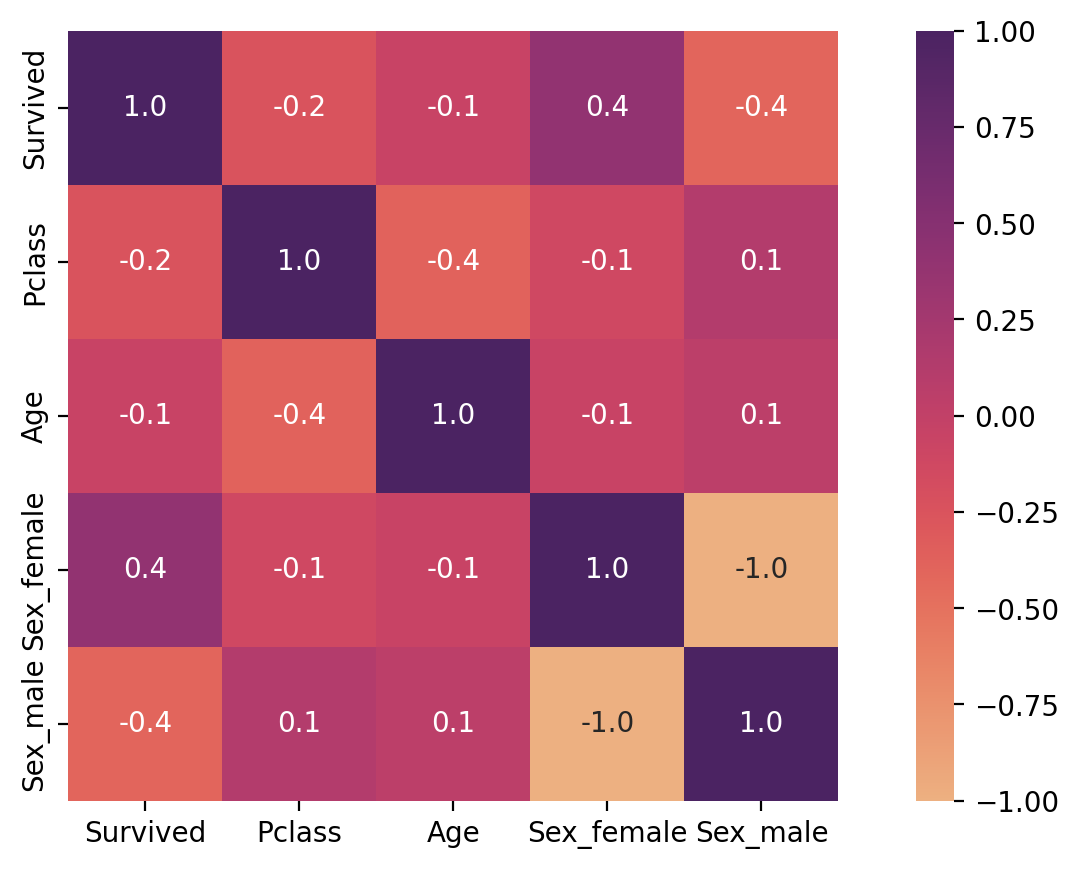

<Figure size 2000x1000 with 0 Axes>

In [26]:
#Heatmap For better understanding of the relationships between the feature of Titanic Dataset 
sns.heatmap(combined_data.corr(), cbar=True, square=True, cmap='flare',annot=True, fmt='.1f',center=0)
plt.figure(figsize=(10,5))
plt.show()

# <b>Model Building </b>

In [27]:
#First Lets split the combined data again into training and testing data 
train_new=combined_data.iloc[:len(TrainingData)]
test_new=combined_data.iloc[len(TrainingData):len(TrainingData)+len(TestingData)]

In [28]:
#spliting the concatenated data again into training and testing data 
train_new,test_new

(     Survived  Pclass   Age  Sex_female  Sex_male
 0         0.0     3.0  22.0         0.0       1.0
 1         1.0     1.0  38.0         1.0       0.0
 2         1.0     3.0  26.0         1.0       0.0
 3         1.0     1.0  35.0         1.0       0.0
 4         0.0     3.0  35.0         0.0       1.0
 ..        ...     ...   ...         ...       ...
 886       0.0     2.0  27.0         0.0       1.0
 887       1.0     1.0  19.0         1.0       0.0
 888       0.0     3.0  28.0         1.0       0.0
 889       1.0     1.0  26.0         0.0       1.0
 890       0.0     3.0  32.0         0.0       1.0
 
 [891 rows x 5 columns],
       Survived  Pclass   Age  Sex_female  Sex_male
 891        0.0     3.0  34.5         0.0       1.0
 892        0.0     3.0  47.0         1.0       0.0
 893        0.0     2.0  54.5         0.0       1.0
 894        0.0     3.0  27.0         0.0       1.0
 895        0.0     3.0  22.0         1.0       0.0
 ...        ...     ...   ...         ...       .

In [29]:
#spliting the data into Dependent and independent variable 
x_train=train_new.iloc[:,1:]
y_train=train_new['Survived']
x_test = test_new.iloc[:,1:]
y_test = test_new['Survived']

In [30]:
X_col = x_train.columns
Y_col = ['Survived']

In [31]:
#Printing the train and test data 
x_train,x_test,y_train,y_test

(     Pclass   Age  Sex_female  Sex_male
 0       3.0  22.0         0.0       1.0
 1       1.0  38.0         1.0       0.0
 2       3.0  26.0         1.0       0.0
 3       1.0  35.0         1.0       0.0
 4       3.0  35.0         0.0       1.0
 ..      ...   ...         ...       ...
 886     2.0  27.0         0.0       1.0
 887     1.0  19.0         1.0       0.0
 888     3.0  28.0         1.0       0.0
 889     1.0  26.0         0.0       1.0
 890     3.0  32.0         0.0       1.0
 
 [891 rows x 4 columns],
       Pclass   Age  Sex_female  Sex_male
 891      3.0  34.5         0.0       1.0
 892      3.0  47.0         1.0       0.0
 893      2.0  54.5         0.0       1.0
 894      3.0  27.0         0.0       1.0
 895      3.0  22.0         1.0       0.0
 ...      ...   ...         ...       ...
 1304     3.0  28.0         0.0       1.0
 1305     1.0  39.0         1.0       0.0
 1306     3.0  38.5         0.0       1.0
 1307     3.0  28.0         0.0       1.0
 1308     3.0  28.0

In [32]:
#Logistic Model
model = LogisticRegression()
model.fit(x_train,y_train)
ypred = model.predict(x_test)

# ***Accuracy and Classification Report***

In [33]:
#Accuracy and Classification Report
print(f"Accuracy = {accuracy_score(y_test,ypred)}")
print(f"Classification_Report = {classification_report(y_test,ypred)}")

Accuracy = 0.6339712918660287
Classification_Report =               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78       418
         1.0       0.00      0.00      0.00         0

    accuracy                           0.63       418
   macro avg       0.50      0.32      0.39       418
weighted avg       1.00      0.63      0.78       418



In [38]:
#Standardizing the values to increase the accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [40]:
print(f"Accuracy = {accuracy_score(y_test,ypred)}")
print(f"Classification_Report = {classification_report(y_test,ypred)}")

Accuracy = 0.6339712918660287
Classification_Report =               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78       418
         1.0       0.00      0.00      0.00         0

    accuracy                           0.63       418
   macro avg       0.50      0.32      0.39       418
weighted avg       1.00      0.63      0.78       418

